<div class="usecase-title">Wedding Planner Event</div>

<div class="usecase-authors"><b>Authored by: Samarth Shah</b></div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, NumPy, Pandas, Matplotlib, Seaborn, Folium</div>
</div>

<div class="usecase-section-header"><b>Scenario</b></div>

As a wedding planner, I want to identify suitable wedding venues in Melbourne, understand the necessary permits, and locate photogenic areas for wedding photos, so I can provide personalized recommendations to clients and ensure a smooth planning process.

<div class="usecase-section-header"><b>What this use case will teach you</b></div>

At the end of this use case you will:
-  Data wrangling and preprocessing
-  Geospatial analysis and mapping
-  Data visualization
-  Wedding industry knowledge

<div class="usecase-section-header"><b>Introduction or background relating to problem</b></div>

Melbourne is a popular destination for weddings, with numerous venues offering unique settings and backdrops. However, finding the perfect venue can be overwhelming, especially when considering factors like permits, photography opportunities, and previous wedding events. This use case aims to leverage data science techniques to streamline the wedding planning process, providing valuable insights for wedding planners and clients alike.

<b>Background</b></br>
To solve this problem, we will utilize the following datasets:

- Event Permits (2014-2018): This dataset contains information on event permits issued by the City of Melbourne, including weddings, film shoots, and photo shoots. (https://data.melbourne.vic.gov.au/explore/dataset/event-permits-2014-2018-including-film-shoots-photo-shoots-weddings-christmas-pa/information/)
- Outdoor Artworks: This dataset features information on outdoor artworks in Melbourne, which can serve as photogenic backdrops for wedding photos. (https://data.melbourne.vic.gov.au/explore/dataset/outdoor-artworks/information/
)
- Public Artworks, Fountains, and Monuments: This dataset provides information on public artworks, fountains, and monuments in Melbourne, offering additional photography opportunities. (https://data.melbourne.vic.gov.au/explore/dataset/public-artworks-fountains-and-monuments/information/)

By combining these datasets, we can identify popular wedding venues, understand permit requirements, and pinpoint photogenic areas for wedding photos, ultimately enhancing the wedding planning experience.

### 1.Importing required libraries

In [7]:
pip install requests pandas matplotlib seaborn folium 

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Samarth\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [9]:
# URLs for the datasets
url1 = "https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/event-permits-2014-2018-including-film-shoots-photo-shoots-weddings-christmas-pa/records?limit=-1"
url2 = "https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/outdoor-artworks/records?limit=-1"
url3 = "https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/public-artworks-fountains-and-monuments/records?limit=-1"

# Function to download and convert to DataFrame
def download_data(link):
    response = requests.get(link)
    response.raise_for_status()
    data = response.json()
    records = data['results']
    return pd.DataFrame(records)

# Download the datasets
df_permits = download_data(url1)
df_artworks = download_data(url2)
df_public_artworks = download_data(url3)

# Display the first few rows of each dataset
print("Event Permits:\n", df_permits.head(), "\n")
print("Outdoor Artworks:\n", df_artworks.head(), "\n")
print("Public Artworks, Fountains, and Monuments:\n", df_public_artworks.head(), "\n")


Event Permits:
                   title event_start   event_end       category_1  \
0  The Moon And The Sun  2014-05-05  2014-05-10  Filming - Movie   
1       Childhood's End  2014-12-04  2014-12-04  Filming - Movie   
2       Childhood's End  2014-12-09  2014-12-10  Filming - Movie   
3              Dogfight  2016-08-28  2016-08-28  Filming - Movie   
4              Dogfight  2016-09-10  2016-09-10  Filming - Movie   

            category_2                            location  
0                 None                   Promotional Sites  
1                 None                        Princes Park  
2                 None  Little Bourke Street, Rankins Lane  
3                 None     Treasury Gardens, Spring Street  
4  Filming - Unit Base                Other Park Locations   

Outdoor Artworks:
                                         geo_point_2d  \
0  {'lon': 144.96706152142454, 'lat': -37.8164236...   
1  {'lon': 144.96773271682704, 'lat': -37.8260713...   
2  {'lon': 144.97395

### 2.Clean and Process the data

In [10]:
# Normalize text (e.g., strip leading/trailing whitespace, convert to lowercase)
def normalize_text(df, columns):
    for col in columns:
        df[col] = df[col].str.strip().str.lower()
    return df

df_permits = normalize_text(df_permits, ['title', 'location'])
df_artworks = normalize_text(df_artworks, ['title', 'location'])
df_public_artworks = normalize_text(df_public_artworks, ['name', 'address_point'])

# Convert dict columns to string
df_artworks['geo_point_2d'] = df_artworks['geo_point_2d'].astype(str)
df_artworks['geo_shape'] = df_artworks['geo_shape'].astype(str)
df_public_artworks['co_ordinates'] = df_public_artworks['co_ordinates'].astype(str)

# Handle missing values
df_permits.fillna('unknown', inplace=True)
df_artworks.fillna('unknown', inplace=True)
df_public_artworks.fillna('unknown', inplace=True)

# Remove duplicates
df_permits.drop_duplicates(inplace=True)
df_artworks.drop_duplicates(inplace=True)
df_public_artworks.drop_duplicates(inplace=True)

print("Cleaned Event Permits:\n", df_permits.head(), "\n")
print("Cleaned Outdoor Artworks:\n", df_artworks.head(), "\n")
print("Cleaned Public Artworks, Fountains, and Monuments:\n", df_public_artworks.head(), "\n")



Cleaned Event Permits:
                   title event_start   event_end       category_1  \
0  the moon and the sun  2014-05-05  2014-05-10  Filming - Movie   
1       childhood's end  2014-12-04  2014-12-04  Filming - Movie   
2       childhood's end  2014-12-09  2014-12-10  Filming - Movie   
3              dogfight  2016-08-28  2016-08-28  Filming - Movie   
4              dogfight  2016-09-10  2016-09-10  Filming - Movie   

            category_2                            location  
0              unknown                   promotional sites  
1              unknown                        princes park  
2              unknown  little bourke street, rankins lane  
3              unknown     treasury gardens, spring street  
4  Filming - Unit Base                other park locations   

Cleaned Outdoor Artworks:
                                         geo_point_2d  \
0  {'lon': 144.96706152142454, 'lat': -37.8164236...   
1  {'lon': 144.96773271682704, 'lat': -37.8260713...   
2  {

### 3. Analyse the data

In [11]:
# Summary Statistics
print("Event Permits Summary:")
print(df_permits.describe(include='all'))

print("\nOutdoor Artworks Summary:")
print(df_artworks.describe(include='all'))

print("\nPublic Artworks Summary:")
print(df_public_artworks.describe(include='all'))

# Distribution of Events Over Time
df_permits['event_start'] = pd.to_datetime(df_permits['event_start'])
df_permits['event_end'] = pd.to_datetime(df_permits['event_end'])

Event Permits Summary:
                 title event_start   event_end           category_1  \
count              100         100         100                  100   
unique              80          98          98                    7   
top     the wrong girl  2014-07-23  2014-07-23  Filming - TV Series   
freq                 5           2           2                   52   

       category_2                location  
count         100                     100  
unique          4                      69  
top       unknown  inner suburb locations  
freq           97                      10  

Outdoor Artworks Summary:
                                             geo_point_2d  \
count                                                 100   
unique                                                100   
top     {'lon': 144.96706152142454, 'lat': -37.8164236...   
freq                                                    1   
mean                                                  NaN   
std     

### Displaying the Data

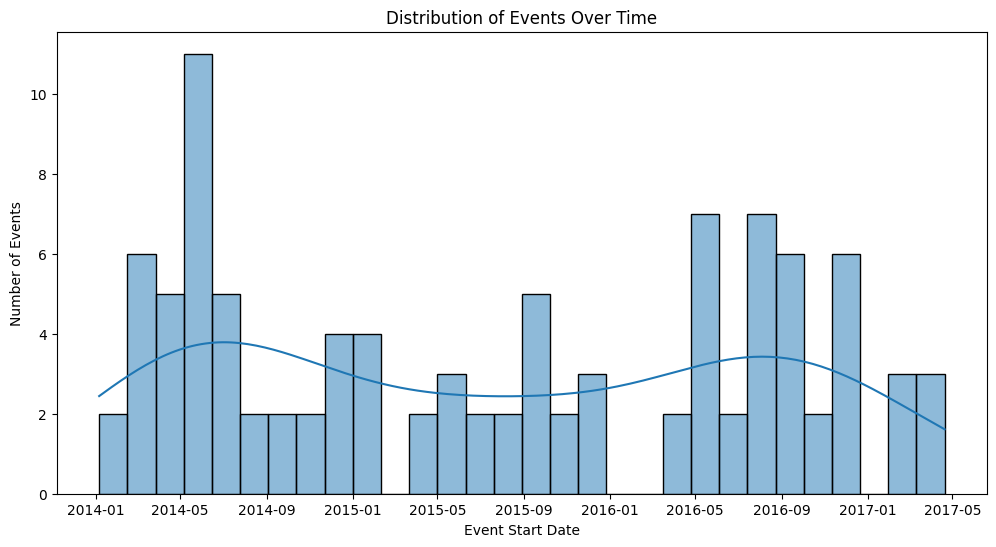

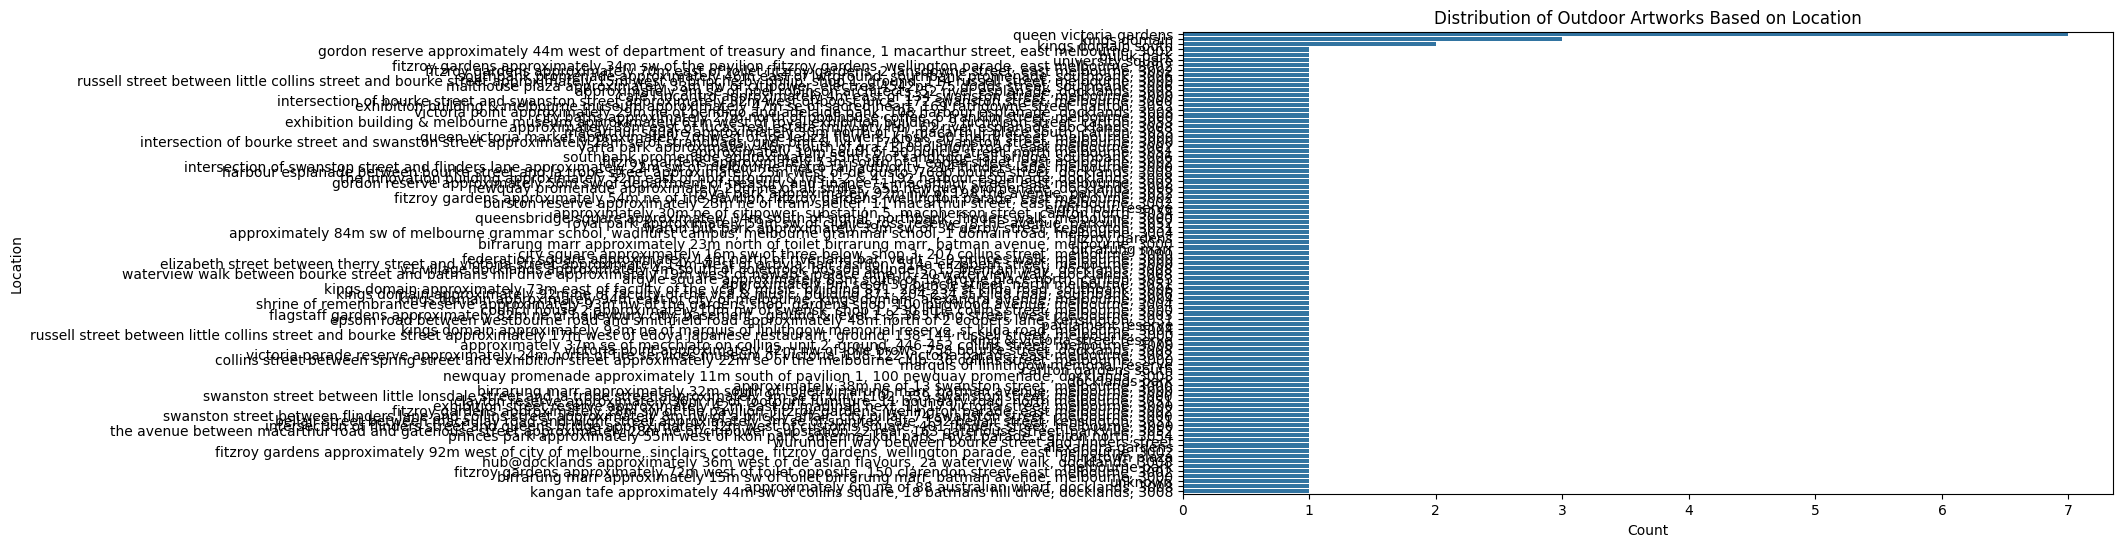

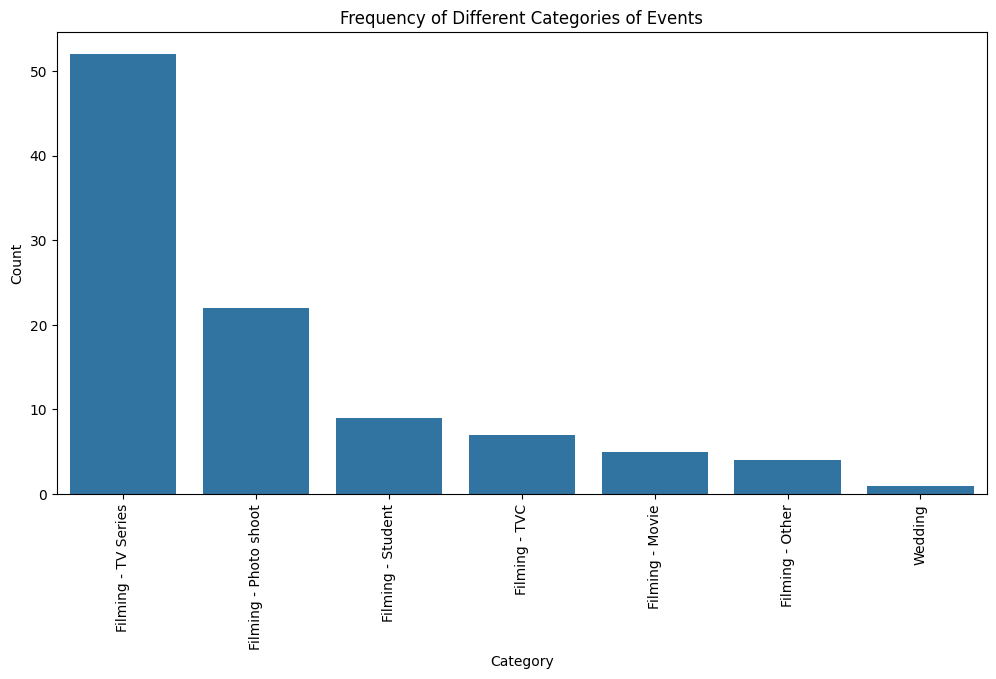

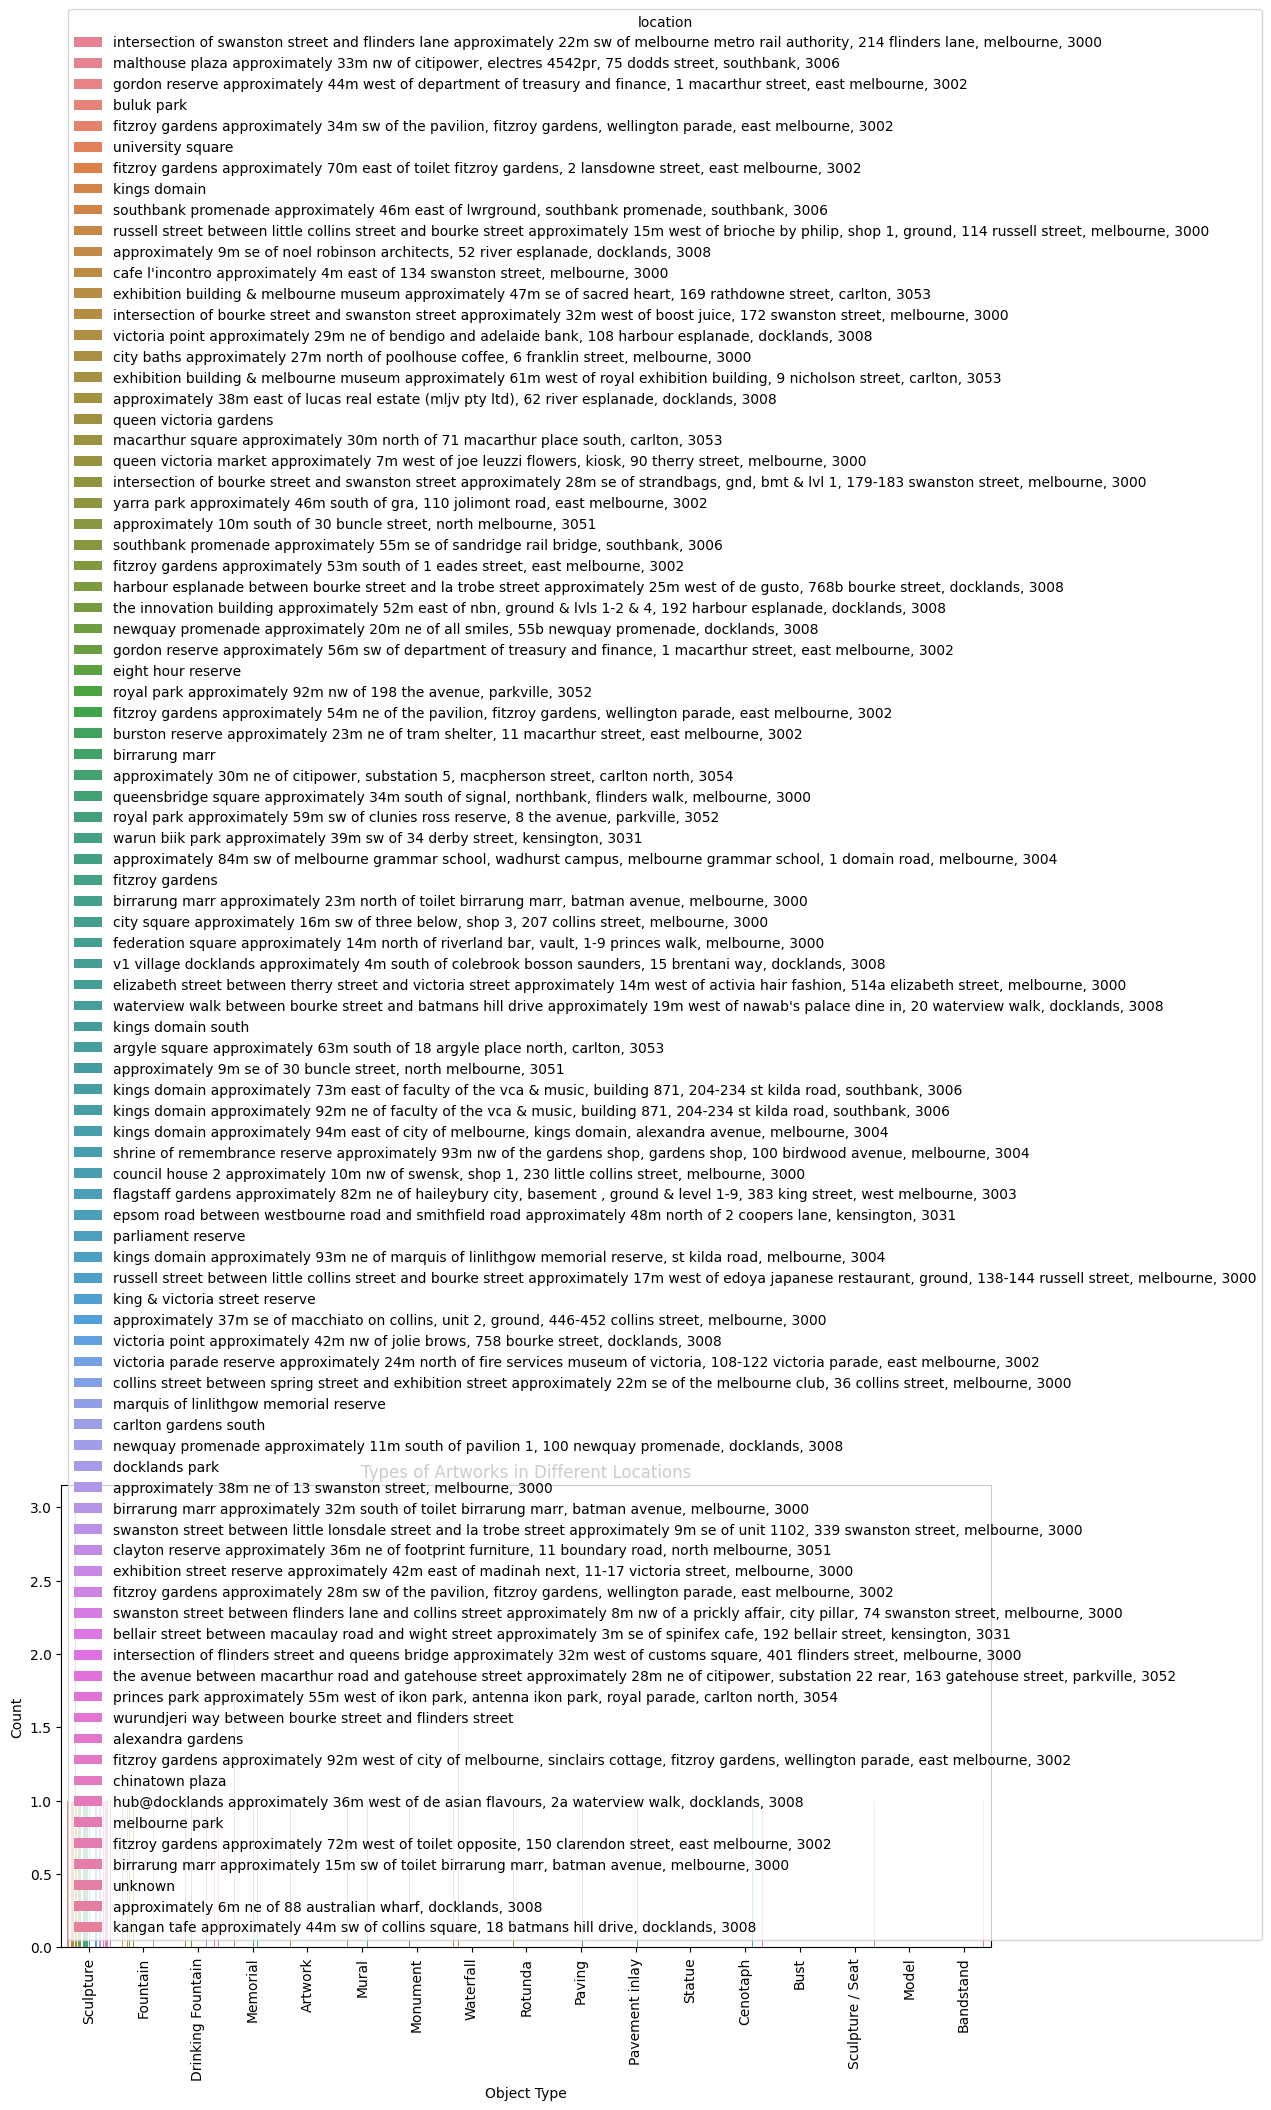

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(df_permits['event_start'], bins=30, kde=True)
plt.title('Distribution of Events Over Time')
plt.xlabel('Event Start Date')
plt.ylabel('Number of Events')
plt.show()

# Distribution of Artworks Based on Location
plt.figure(figsize=(12, 6))
sns.countplot(y='location', data=df_artworks, order=df_artworks['location'].value_counts().index)
plt.title('Distribution of Outdoor Artworks Based on Location')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

# Map Locations of Artworks and Events
def create_map(df, lat_col, lon_col, title_col):
    m = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)
    for idx, row in df.iterrows():
        folium.Marker(location=[row[lat_col], row[lon_col]], popup=row[title_col]).add_to(m)
    return m

# Assuming df_artworks has 'latitude' and 'longitude' columns
map_artworks = create_map(df_artworks, 'latitude', 'longitude', 'title')
map_artworks.save('artworks_map.html')

# Comparing Frequency of Different Categories of Events
plt.figure(figsize=(12, 6))
sns.countplot(x='category_1', data=df_permits, order=df_permits['category_1'].value_counts().index)
plt.title('Frequency of Different Categories of Events')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Types of Artworks in Different Locations
plt.figure(figsize=(12, 6))
sns.countplot(x='object_type', hue='location', data=df_artworks)
plt.title('Types of Artworks in Different Locations')
plt.xlabel('Object Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()